Found 16504 images belonging to 15 classes.
Found 2064 images belonging to 15 classes.
Found 2070 images belonging to 15 classes.


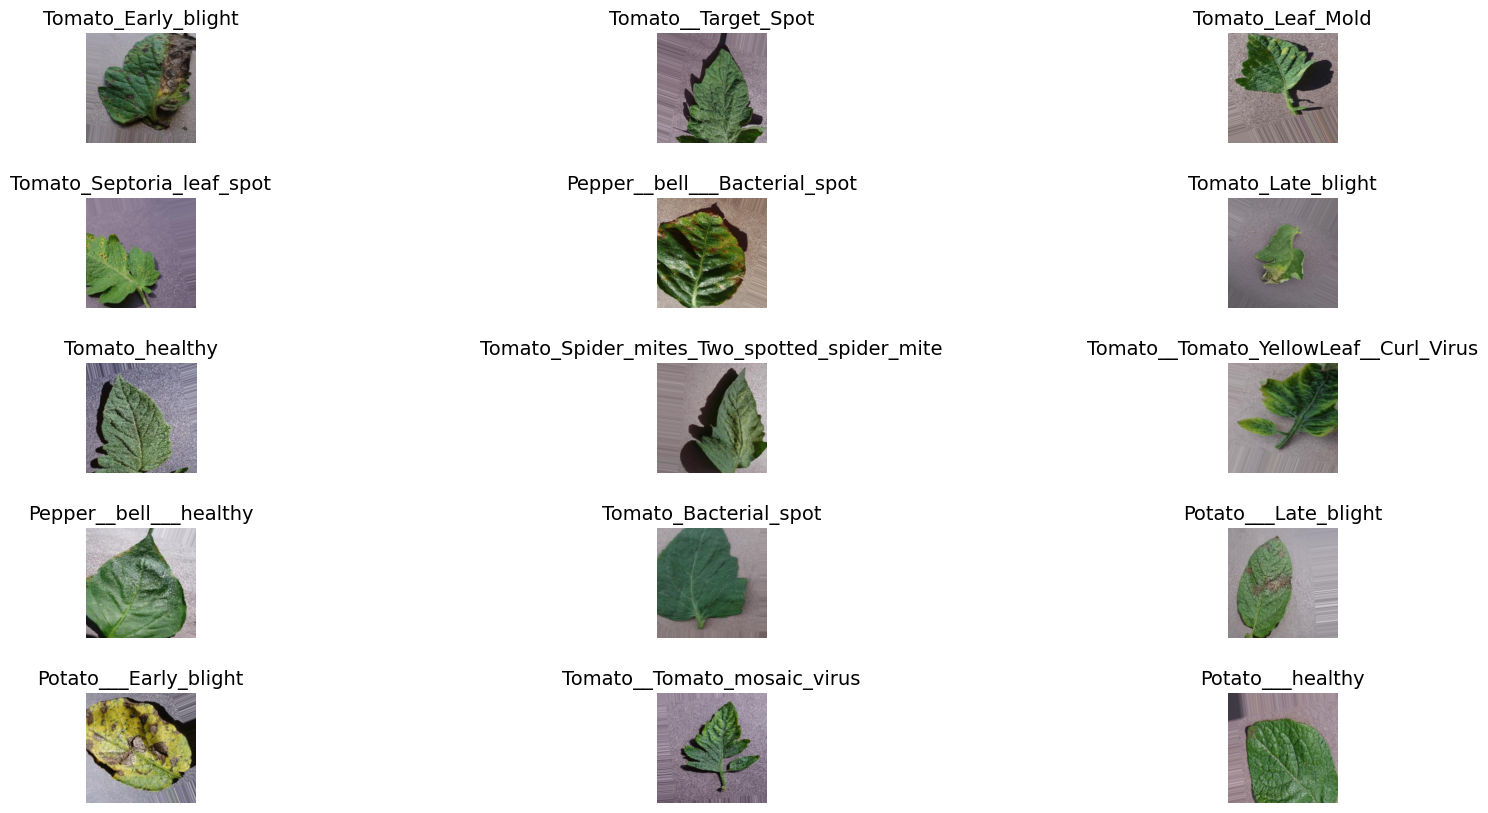

In [1]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import layers, models


%run DataPre.ipynb

In [2]:
def residual_block(x, filters, kernel_size=3, stride=1):
    # Shortcut connection
    shortcut = x
    
    # Convolutional Layer 1
    x = layers.Conv2D(filters, kernel_size=kernel_size, strides=stride, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    
    # Convolutional Layer 2
    x = layers.Conv2D(filters, kernel_size=kernel_size, strides=stride, padding="same")(x)
    x = layers.BatchNormalization()(x)
    
    # Add the shortcut connection
    x = layers.add([x, shortcut])
    x = layers.ReLU()(x)
    
    return x

In [3]:
def build_resnet(input_shape, num_classes, num_blocks=3, filters=64):
    input_layer = layers.Input(shape=input_shape)
    
    # Initial Convolution Layer
    x = layers.Conv2D(filters, kernel_size=7, strides=2, padding="same")(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    
    # Max Pooling
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding="same")(x)
    
    # Adding Residual Blocks
    for _ in range(num_blocks):
        x = residual_block(x, filters)
    
    # Global Average Pooling
    x = layers.GlobalAveragePooling2D()(x)
    
    # Fully Connected Layer
    x = layers.Dense(512, activation='relu')(x)
    output_layer = layers.Dense(num_classes, activation='softmax')(x)
    
    # Model Definition
    model = models.Model(inputs=input_layer, outputs=output_layer)
    
    return model

In [4]:
# Build ResNet model
input_shape = (224, 224, 3)  # Input image shape
num_classes = len(train_generator.class_indices)  # Number of classes based on your dataset
model_resnet_scratch = build_resnet(input_shape, num_classes, num_blocks=3, filters=64)

In [5]:
# Compile the model
model_resnet_scratch.compile(optimizer=Adam(learning_rate=0.0001),
                             loss='categorical_crossentropy',
                             metrics=['accuracy'])

In [6]:
# Summary of the model
# model_resnet_scratch.summary()

In [6]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the model weights from the epoch with the best validation loss
)

In [7]:
# Train the model
history = model_resnet_scratch.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stopping]
)

c:\Users\youse\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 705s 1s/step - accuracy: 0.4725 - loss: 1.7581 - val_accuracy: 0.1890 - val_loss: 4.1100
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 736s 1s/step - accuracy: 0.7482 - loss: 0.7992 - val_accuracy: 0.5780 - val_loss: 1.2171
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 776s 2s/step - accuracy: 0.8040 - loss: 0.6120 - val_accuracy: 0.6042 - val_loss: 1.1645
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 781s 2s/step - accuracy: 0.8436 - loss: 0.5024 - val_accuracy: 0.7277 - val_loss: 0.7669
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 749s 1s/step - accuracy: 0.8590 - loss: 0.4494 - val_accuracy: 0.7471 - val_loss: 0.7713
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 761s 1s/step - accuracy: 0.8772 - loss: 0.3926 - val_accuracy: 0.7703 - val_loss: 0.7444
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 772s 1s/step - accuracy: 0.8911 - loss: 0.3406 - val_accuracy: 0.7810 - val_loss: 0.6631
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 774s 1s/step - accuracy: 0.9062 - loss: 0.3076 - val_accu

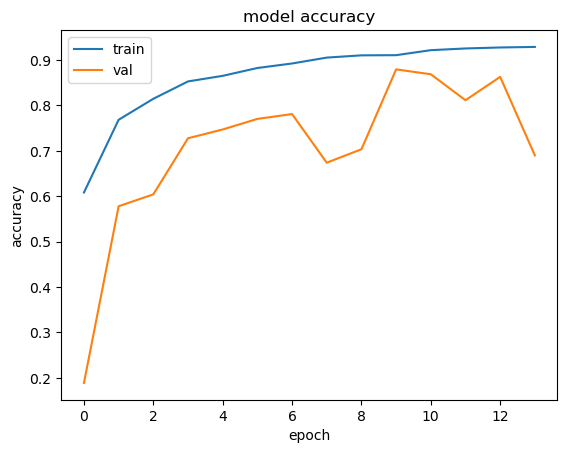

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

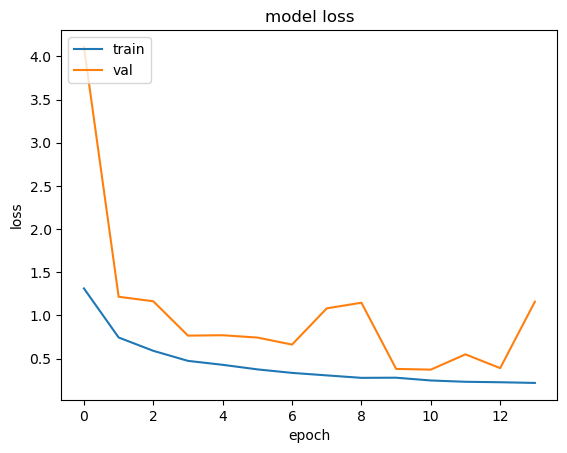

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
# Save the model
model_resnet_scratch.save('resnet_plantvillage.keras')

In [11]:
# Evaluate the model on the test set
test_loss_resnet, test_acc_resnet = model_resnet_scratch.evaluate(test_generator)
print(f"Test Accuracy for Resnet: {test_acc_resnet:.2f}")

65/65 ━━━━━━━━━━━━━━━━━━━━ 15s 227ms/step - accuracy: 0.8078 - loss: 0.7017
Test Accuracy for Resnet: 0.73


65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 238ms/step


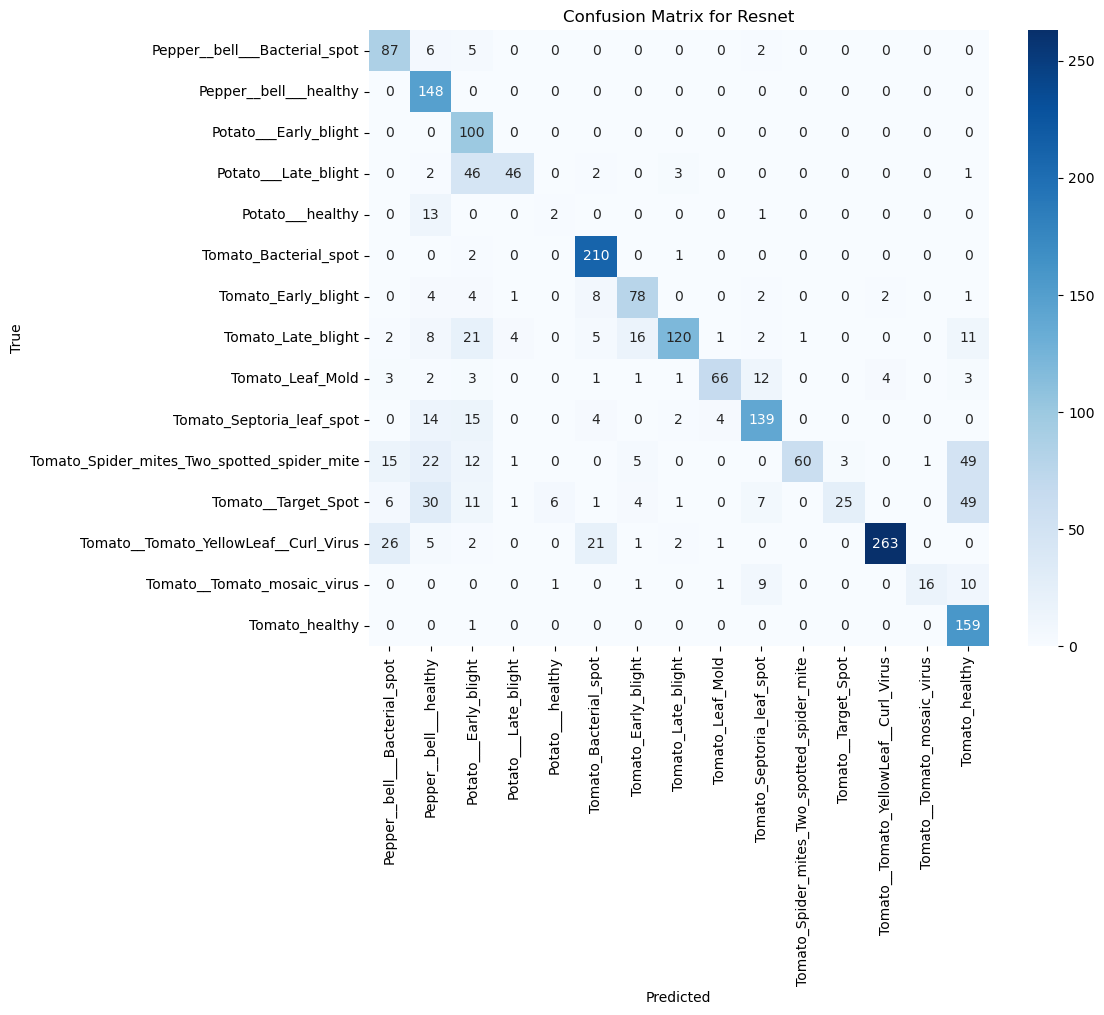

In [12]:
# Get true labels from the test generator
y_true = test_generator.classes

# Prediction and evaluation (Confusion Matrix, ROC, etc.)
predictions_resnet = model_resnet_scratch.predict(test_generator)
y_pred_resnet = np.argmax(predictions_resnet, axis=1)

# Confusion Matrix
conf_matrix_resnet = confusion_matrix(y_true, y_pred_resnet)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_resnet, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Resnet')
plt.show()

In [13]:
# Classification Report
report_resnet = classification_report(y_true, y_pred_resnet, target_names=test_generator.class_indices.keys())
print("Classification Report for Resnet:\n", report_resnet)

Classification Report for Resnet:
                                              precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.63      0.87      0.73       100
                     Pepper__bell___healthy       0.58      1.00      0.74       148
                      Potato___Early_blight       0.45      1.00      0.62       100
                       Potato___Late_blight       0.87      0.46      0.60       100
                           Potato___healthy       0.22      0.12      0.16        16
                      Tomato_Bacterial_spot       0.83      0.99      0.90       213
                        Tomato_Early_blight       0.74      0.78      0.76       100
                         Tomato_Late_blight       0.92      0.63      0.75       191
                           Tomato_Leaf_Mold       0.90      0.69      0.78        96
                  Tomato_Septoria_leaf_spot       0.80      0.78      0.79       178
Tomato_Spider_mites_Two_spott

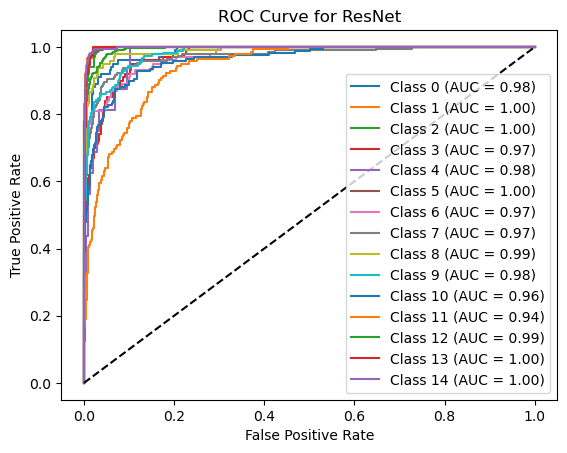

In [14]:
# Binarize the true labels
y_true_bin = label_binarize(y_true, classes=np.arange(len(test_generator.class_indices)))

# Get the ROC curve and AUC for each class
fpr_resnet, tpr_resnet, roc_auc_resnet = {}, {}, {}
for i in range(len(test_generator.class_indices)):
    fpr_resnet[i], tpr_resnet[i], _ = roc_curve(y_true_bin[:, i], predictions_resnet[:, i])
    roc_auc_resnet[i] = auc(fpr_resnet[i], tpr_resnet[i])

# Plot ROC curve for each class
plt.figure()
for i in range(len(test_generator.class_indices)):
    plt.plot(fpr_resnet[i], tpr_resnet[i], label=f'Class {i} (AUC = {roc_auc_resnet[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ResNet')
plt.legend(loc='lower right')
plt.show()